We will build a Linear regression model for Medical cost dataset.
The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature,
which are independent and charge as a dependent feature.
We will predict individual medical costs billed by health insurance.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import and read data

In [2]:
file_path = '/Users/anant/Downloads/insurance.csv'
df = pd.read_csv(file_path)
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Data Analysis

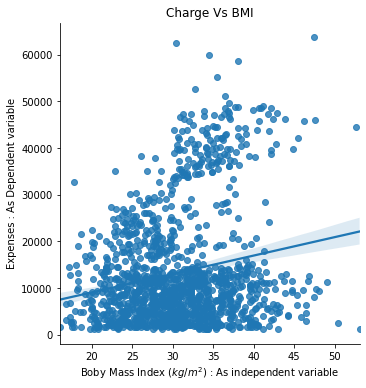

In [4]:
sns.lmplot(x = 'bmi', y = 'expenses', data=df)

plt.xlabel('Boby Mass Index $(kg/m^2)$ : As independent variable')
plt.ylabel('Expenses : As Dependent variable')
plt.title('Charge Vs BMI')
plt.show()

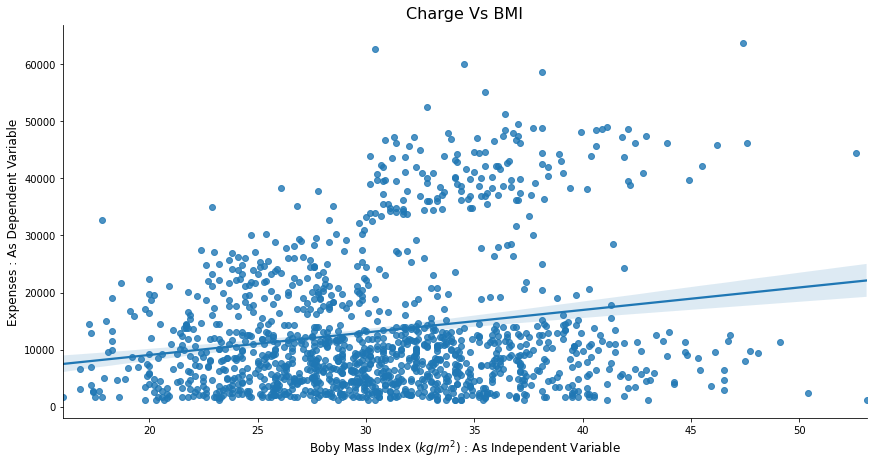

In [5]:
sns.lmplot(x = 'bmi', y = 'expenses', data=df, aspect = 2, height = 6)

plt.xlabel('Boby Mass Index $(kg/m^2)$ : As Independent Variable', fontsize = 12)
plt.ylabel('Expenses : As Dependent Variable', fontsize = 12)
plt.title('Charge Vs BMI', fontsize = 16)
plt.show()

### Check for missing value

In [6]:
if True in df.notnull():
    print("yes")
else:
    print("No")

No


Another Method

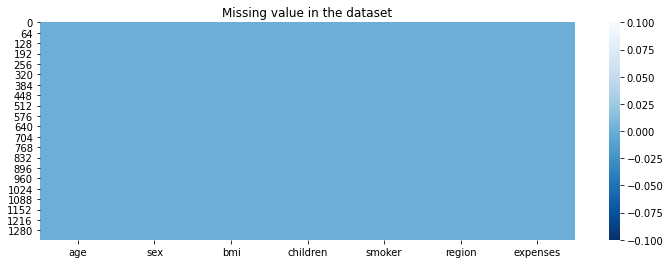

In [7]:
plt.figure(figsize=(12,4))

sns.heatmap(df.isnull(), cmap = 'Blues_r')

plt.title('Missing value in the dataset');

No NULL value

### Finding correlation in data

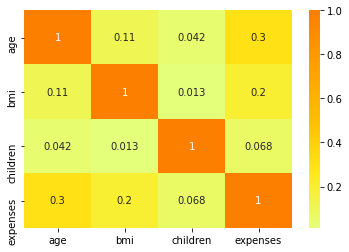

In [8]:
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.show()

There is as such no correlation

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


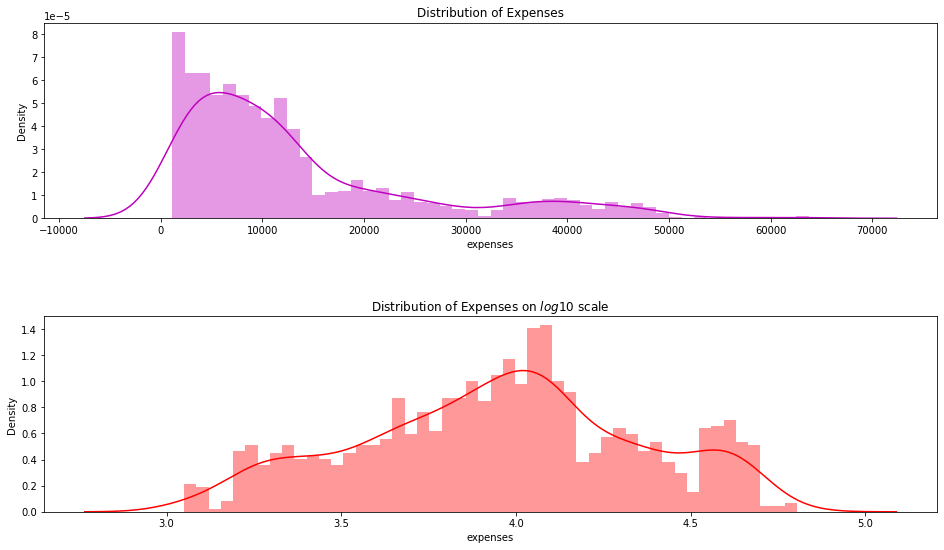

In [9]:
plt.figure(figsize = (16, 9))

plt.subplot(2,1, 1)
sns.distplot(df['expenses'], color = 'm', bins = 50)
plt.title('Distribution of Expenses')

plt.subplot(2, 1, 2)
sns.distplot(np.log10(df['expenses']), color = 'r', bins = 50)
plt.title('Distribution of Expenses on $log10$ scale')

plt.subplots_adjust(hspace = 0.5)

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed.
In right plot we will apply natural log, then plot approximately tends to normal.

For further analysis we will apply log on target variable charges.

Text(0, 0.5, 'Expenses')

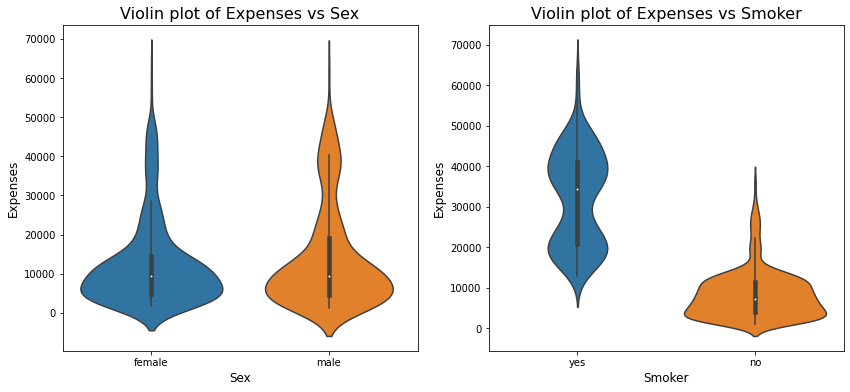

In [10]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(1, 2, 1)
sns.violinplot(x = 'sex', y = 'expenses', data = df, ax = ax)
ax.set_title('Violin plot of Expenses vs Sex', fontsize = 16)
ax.set_xlabel('Sex', fontsize = 12)
ax.set_ylabel('Expenses', fontsize = 12)

ax = f.add_subplot(1, 2, 2)
sns.violinplot(x='smoker', y='expenses',data = df, ax = ax)
ax.set_title('Violin plot of Expenses vs Smoker', fontsize = 16);
ax.set_xlabel('Smoker', fontsize = 12)
ax.set_ylabel('Expenses', fontsize = 12)

From left plot the insurance charge for male and female is approx. in same range,it is average around 5000 bucks.
In right plot the insurance charge for smokers is much wide range compare to non smokers,
the average charges for non smoker is approximately 5000 bucks.
For smoker the minimum insurance charge is itself 5000 bucks.

The Dummy variable trap is a scenario in which the independent variable are multicollinear,
a scenario in which two or more variables are highly correlated.
In simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code.
We will this fuction to get dummy variable for sex, children,smoker,region features.
By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.
The pandas makes our life easy.

In [11]:
categorical_columns = ['sex','children', 'smoker', 'region']

df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep = '_', columns = categorical_columns,
                           drop_first =True, dtype='int8')

In [12]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'expenses' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


Box -Cox transformation

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape.
Normality is an important assumption for many statistical techniques;
if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.
All that we need to perform this transformation is to find lambda value and apply the rule shown,
below to your variable.
 
The trick of Box-Cox transformation is to find lambda value,
however in practice this is quite affordable.
The following function returns the transformed variable, lambda value,confidence interval.

In [13]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['expenses'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.011402950284988304, 0.09880965012231949), 0.04364902969059508)

In [14]:
## Log transform
df_encode['expenses'] = np.log(df_encode['expenses'])

The original categorical variable are removed and also,
one of the one hot encode varible column for perticular categorical variable is droped from the column.
So we completed all three encoding step by using get dummies function.

### Test Train Split

In [15]:
from sklearn.model_selection import train_test_split

X = df_encode.drop('expenses', axis = 1)
y = df_encode['expenses']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 23)

In [16]:
print(f'Training dataset size = {X_train.shape}\nTesting dataset size ={X_test.shape}')

Training dataset size = (936, 12)
Testing dataset size =(402, 12)


### Model Building

In [17]:
print(type(X_train))
X_train.head()

<class 'pandas.core.frame.DataFrame'>


,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
923,34,35.8,1,0,0,0,0,0,0,1,0,0
1121,46,38.2,1,0,1,0,0,0,0,0,1,0
713,20,40.5,1,0,0,0,0,0,0,0,0,0
552,62,21.4,1,0,0,0,0,0,0,0,0,1
738,23,31.7,1,0,0,1,0,0,1,0,0,0


We will apply normal equation, so we need to add a colums of x0 so that our X matrix becomes m * (n+1) dimension.
So, that we can multiply it theta(n+1 dimen. vector), to get the hypothesis.

hθ(x) = X * θ


In [18]:
X_train.insert(0, 'x_0', 1, True)
X_test.insert(0, 'x_0', 1, True)

X_train.head()

,x_0,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
923,1,34,35.8,1,0,0,0,0,0,0,1,0,0
1121,1,46,38.2,1,0,1,0,0,0,0,0,1,0
713,1,20,40.5,1,0,0,0,0,0,0,0,0,0
552,1,62,21.4,1,0,0,0,0,0,0,0,0,1
738,1,23,31.7,1,0,0,1,0,0,1,0,0,0


 θ = (XT * X)^-1 (XT * y) 

In [19]:
theta = np.dot( np.linalg.pinv(np.dot(X_train.transpose(), X_train)),np.dot(X_train.transpose(), y_train) )
print(theta.shape)
theta

(13,)


array([ 7.05952857,  0.03313419,  0.01350335, -0.06775339,  0.14948114,
        0.27295892,  0.24406603,  0.52341977,  0.46611078,  1.55043951,
       -0.05585593, -0.14652391, -0.13345835])

Hypothesis:
h = X*θ

In [20]:
parameter = []
for i in range(0, theta.size):
             s = str(i)
             parameter.append('theta_'+s)
parameter

['theta_0',
 'theta_1',
 'theta_2',
 'theta_3',
 'theta_4',
 'theta_5',
 'theta_6',
 'theta_7',
 'theta_8',
 'theta_9',
 'theta_10',
 'theta_11',
 'theta_12']

In [21]:
columns = list(X_train.columns.values)
columns

['x_0',
 'age',
 'bmi',
 'OHE_male',
 'OHE_1',
 'OHE_2',
 'OHE_3',
 'OHE_4',
 'OHE_5',
 'OHE_yes',
 'OHE_northwest',
 'OHE_southeast',
 'OHE_southwest']

In [22]:
parameter_df = pd.DataFrame({'Parameter': parameter, 'Columns': columns, "theta": theta})
parameter_df

,Parameter,Columns,theta
0,theta_0,x_0,7.059529
1,theta_1,age,0.033134
2,theta_2,bmi,0.013503
3,theta_3,OHE_male,-0.067753
4,theta_4,OHE_1,0.149481
5,theta_5,OHE_2,0.272959
6,theta_6,OHE_3,0.244066
7,theta_7,OHE_4,0.523420
8,theta_8,OHE_5,0.466111
9,theta_9,OHE_yes,1.550440


### Using the Sk learn module

In [23]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()


In [24]:
# Note: x_0 = 1 is no need to add, sklearn will take care of it.

X_train.drop('x_0', axis = 1, inplace = True)
X_train.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
923,34,35.8,1,0,0,0,0,0,0,1,0,0
1121,46,38.2,1,0,1,0,0,0,0,0,1,0
713,20,40.5,1,0,0,0,0,0,0,0,0,0
552,62,21.4,1,0,0,0,0,0,0,0,0,1
738,23,31.7,1,0,0,1,0,0,1,0,0,0


In [25]:
linear_reg.fit(X_train,y_train)

linear_reg.coef_

array([ 0.03313419,  0.01350335, -0.06775339,  0.14948114,  0.27295892,
        0.24406603,  0.52341977,  0.46611078,  1.55043951, -0.05585593,
       -0.14652391, -0.13345835])

In [26]:
intcpt = linear_reg.intercept_
intcpt

7.059528567663586

In [27]:
Sk_learn_theta_list = [intcpt] + list(linear_reg.coef_)

parameter_df.insert(3, 'Sk_learn_theta_size', pd.Series(Sk_learn_theta_list), True)

In [28]:
parameter_df

,Parameter,Columns,theta,Sk_learn_theta_size
0,theta_0,x_0,7.059529,7.059529
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013503,0.013503
3,theta_3,OHE_male,-0.067753,-0.067753
4,theta_4,OHE_1,0.149481,0.149481
5,theta_5,OHE_2,0.272959,0.272959
6,theta_6,OHE_3,0.244066,0.244066
7,theta_7,OHE_4,0.523420,0.523420
8,theta_8,OHE_5,0.466111,0.466111
9,theta_9,OHE_yes,1.550440,1.550440


The parameter obtained from both the model are same.
So we succefull build our model using normal equation and verified using sklearn linear regression module.
Let's move ahead, next step is prediction and model evaluvation.

### Model evaluation

We will predict value for target variable by using our model parameter for test data set.
Then compare the predicted value with actual valu in test set.
We compute Mean Square Error.

𝐑^2 is statistical measure of how close data are to the fitted regression line.
𝐑^2 is always between 0 to 100%.
0% indicated that model explains none of the variability of the response data around it's mean.
100% indicated that model explains all the variablity of the response data around the mean.

In [29]:
print(X_test.shape)
X_test.head()

(402, 13)


,x_0,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
918,1,61,28.2,0,0,0,0,0,0,0,0,0,1
755,1,31,27.6,1,0,1,0,0,0,0,0,0,0
207,1,35,27.7,1,0,1,0,0,0,1,0,0,0
520,1,50,27.4,0,0,0,0,0,0,0,0,0,0
695,1,26,40.2,0,0,0,0,0,0,0,1,0,0


In [30]:
# h = X*θ
h = np.dot(X_test, theta)

In [31]:
print(h.shape)
h

(402,)


array([ 9.32805005,  8.66458629, 10.34891288,  9.08622966,  8.40799605,
        8.98058228, 10.75032114,  8.56052118,  9.48603048, 10.95606736,
        8.12785765, 11.03794019,  8.19898243,  9.44491415,  8.80664345,
        8.53343524,  8.63333705,  8.11097403, 10.44181875, 10.44535006,
       11.202992  ,  9.15833381,  8.86362536,  9.18813745, 10.58994956,
        8.51004869,  8.55359744,  9.61553214,  7.98433184,  9.11897867,
        9.38808895,  8.16733895,  8.40485668,  9.45114868,  8.77555608,
        9.82525033,  9.36916714,  9.02919433,  9.20857257,  8.38894405,
        9.19702638, 10.59534835,  9.19110653, 10.55958277,  9.2601245 ,
        9.29877713,  8.47155953,  8.55708172,  9.06506726,  8.69377145,
        9.41448569,  8.84660162,  9.13857681,  8.30125144,  8.44160397,
        9.35333029,  9.25801621,  9.16717352,  8.82323265,  9.61945118,
        9.95122179,  8.4934474 ,  7.90618177,  8.44172443,  8.13696631,
        8.62640203,  8.02659821,  7.94534148,  8.43064771,  9.45

In [32]:
#MSE

J_mse = np.sum((h - y_test)**2)/ X_test.size
J_mse

0.014406571289403074

In [33]:
# R_square 
sse = np.sum((h - y_test)**2)       #Sum of square error
sst = np.sum((y_test - y_test.mean())**2)     #Sum of square total

R_square = 1 - (sse/sst)
R_square

0.7795814253322737

In [34]:
print(f'Mean square error = {J_mse}\nR square = {R_square}')

Mean square error = 0.014406571289403074
R square = 0.7795814253322737


#### Using the Sk learn library

In [35]:
X_test.drop('x_0', axis = 1, inplace = True)

h_sk = linear_reg.predict(X_test)

#MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(h, y_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
#MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(h, y_test)

# R_square
R_square_sk = linear_reg.score(X_test,y_test)

print(f'Mean square error = {J_mse_sk}\nR square = {R_square_sk}')

Mean square error = 0.18728542676223997
R square = 0.7795814253322967


### Model Validation

In order to validated model we need to check few assumption of linear regression model.
The common assumption for Linear Regression model are following:-

1 - Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value

2 - The residual error plot should be normally distributed.

3 - The mean of residual error should be 0 or close to 0 as much as possible

4 - The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.

5 - Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.
𝐕𝐈𝐅=11−𝐑2
VIF
=11−R2,
If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.

6 - Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

Text(0, 0.5, 'Predicted Value')

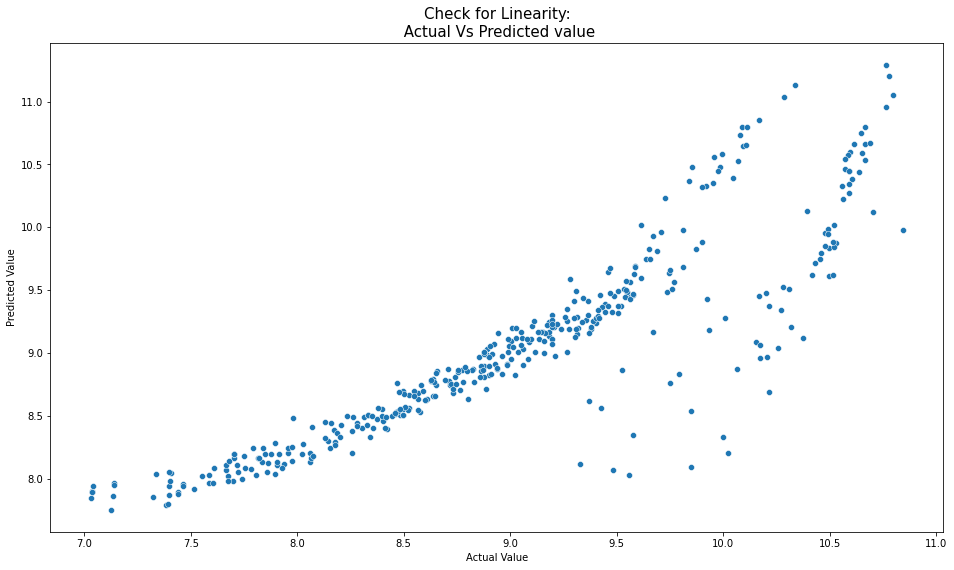

In [37]:
#Point 1
plt.figure(figsize = (16,9))
sns.scatterplot(x = y_test, y = h)

plt.title('Check for Linearity:\n Actual Vs Predicted value', fontsize = 15)
plt.xlabel('Actual Value', fontsize = 10)
plt.ylabel('Predicted Value', fontsize = 10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


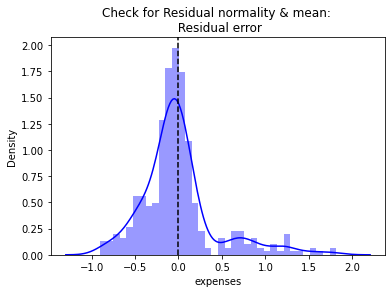

In [38]:
#Point 2
# Check for Residual normality & mean

sns.distplot((y_test - h),color='b')

plt.axvline((y_test - h).mean(),color='k',linestyle='--')

plt.title('Check for Residual normality & mean: \n Residual error');